<a href="https://colab.research.google.com/github/Amirrezahmi/Breast-Cancer-Data-Analysis/blob/main/Basic_about_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load the dataset
file_path = '/content/data.xlsx'
data = pd.read_excel(file_path)
# Display the first few rows to understand its structure
data.head()

,id,age,ER,PR,HER2,KI67,Met,Death,AgeGrd
0,2961,55.0,1.0,1.0,0.0,7.0,1,1,3.0
1,2949,58.0,0.0,0.0,1.0,15.0,1,1,3.0
2,2319,52.0,1.0,1.0,0.0,35.0,1,0,3.0
3,2402,58.0,1.0,1.0,1.0,30.0,1,0,3.0
4,42,78.0,0.0,0.0,0.0,60.0,1,1,5.0


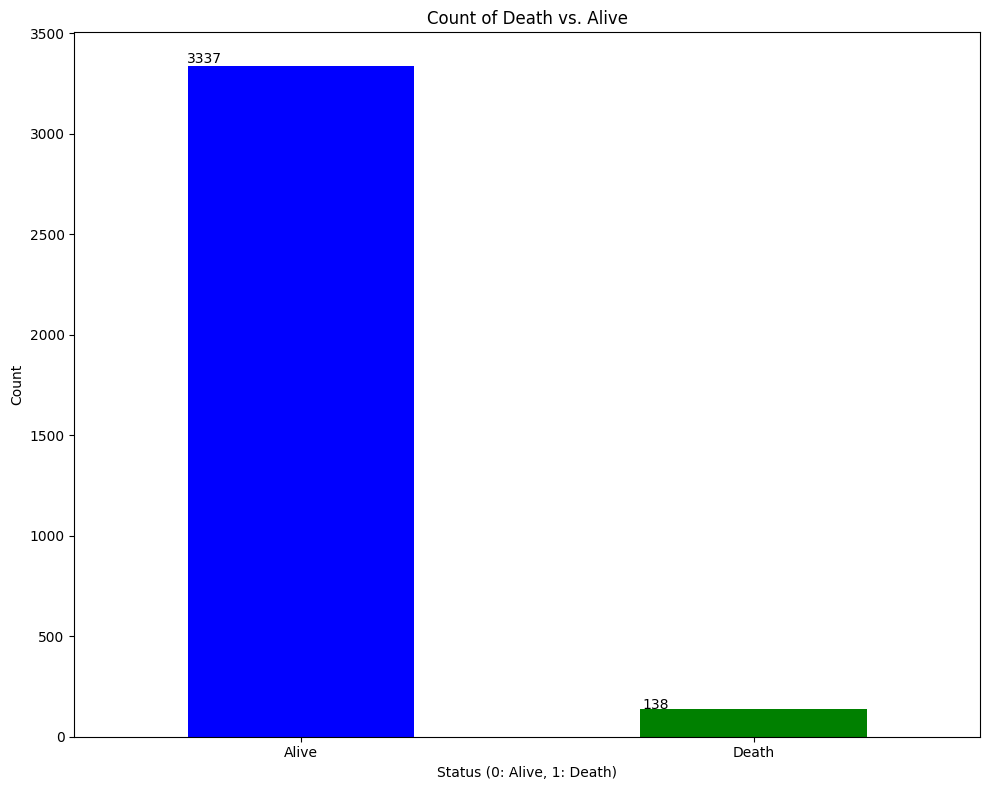

In [ ]:
import matplotlib.pyplot as plt

# Since we want to plot the count of alive vs death, we'll group by the 'Death' column and count the occurrences
death_counts = data['Death'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 8))
death_counts_plot = death_counts.plot(kind='bar', color=['blue', 'green'])
death_counts_plot.set_title('Count of Death vs. Alive')
death_counts_plot.set_xlabel('Status (0: Alive, 1: Death)')
death_counts_plot.set_ylabel('Count')
death_counts_plot.set_xticklabels(['Alive', 'Death'], rotation=0)

# Adding the count above the bars
for i in death_counts_plot.patches:
    death_counts_plot.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-7-0983a7f9e6fb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_data['age_group'] = pd.cut(death_data['age'], bins=bins, right=False)


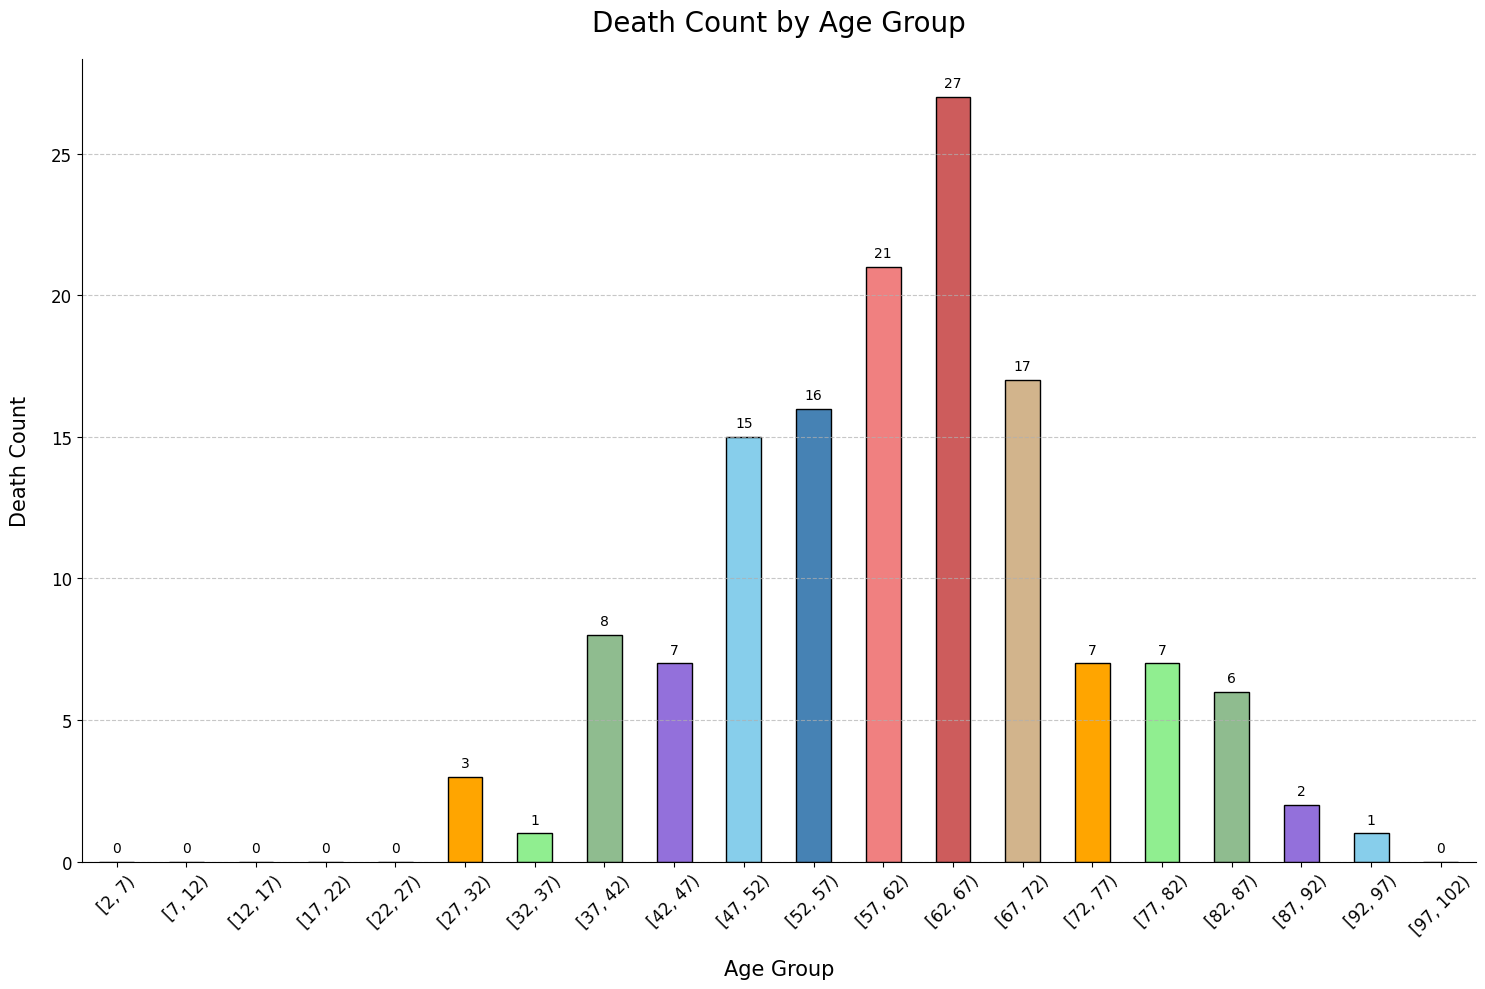

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data to include only the rows where 'Death' is 1
death_data = data[data['Death'] == 1]

# Define the minimum age and create bins every 5 years from the minimum age
min_age = data['age'].min()
bins = list(range(int(min_age), int(data['age'].max()) + 5, 5))

# Categorize each entry into age bins for the death_data DataFrame
death_data['age_group'] = pd.cut(death_data['age'], bins=bins, right=False)
death_by_age_group = death_data.groupby('age_group').size()

# Define a list of colors for the bars
colors = ['skyblue', 'steelblue', 'lightcoral', 'indianred', 'tan',
          'orange', 'lightgreen', 'darkseagreen', 'mediumpurple']

# Plotting the bar chart
plt.figure(figsize=(15, 10))
ax = death_by_age_group.plot(kind='bar', color=colors, edgecolor='black')

# Set title and labels with increased font sizes
ax.set_title('Death Count by Age Group', fontsize=20, pad=20)
ax.set_xlabel('Age Group', fontsize=15, labelpad=15)
ax.set_ylabel('Death Count', fontsize=15, labelpad=15)

# Customize ticks, grid, and spines
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate the bar heights
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

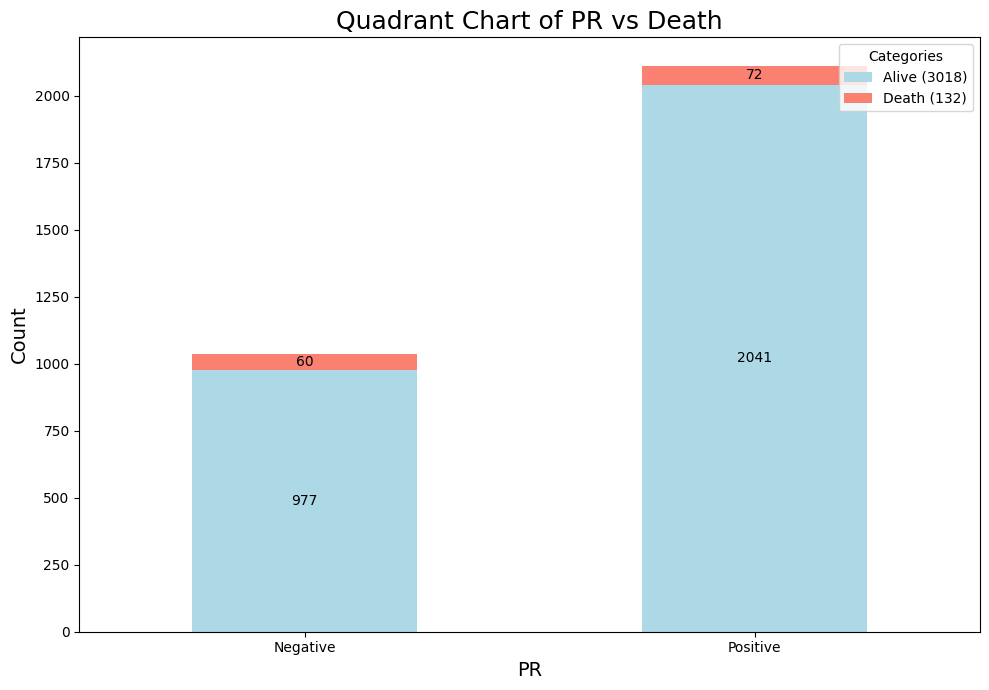

In [ ]:
# First we need to aggregate the data for PR (Progesterone Receptor) status against Alive and Death counts
pr_alive_death = data.groupby(['PR', 'Death']).size().unstack(fill_value=0)
# We will plot a stacked bar chart for this data
colors = ['lightblue', 'salmon']  # Assigning different colors for Alive and Death
# Creating the bar chart
ax = pr_alive_death.plot(kind='bar', stacked=True, color=colors, figsize=(10, 7))
# Adding title and labels
ax.set_title('Quadrant Chart of PR vs Death', fontsize=18)
ax.set_xlabel('PR', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
# Annotating the count on top of each stacked segment
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='center')
# Adding a legend with custom labels
alive_label = f'Alive ({pr_alive_death.loc[0, 0] + pr_alive_death.loc[1, 0]})'
death_label = f'Death ({pr_alive_death.loc[0, 1] + pr_alive_death.loc[1, 1]})'
ax.legend([alive_label, death_label], title='Categories', loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()

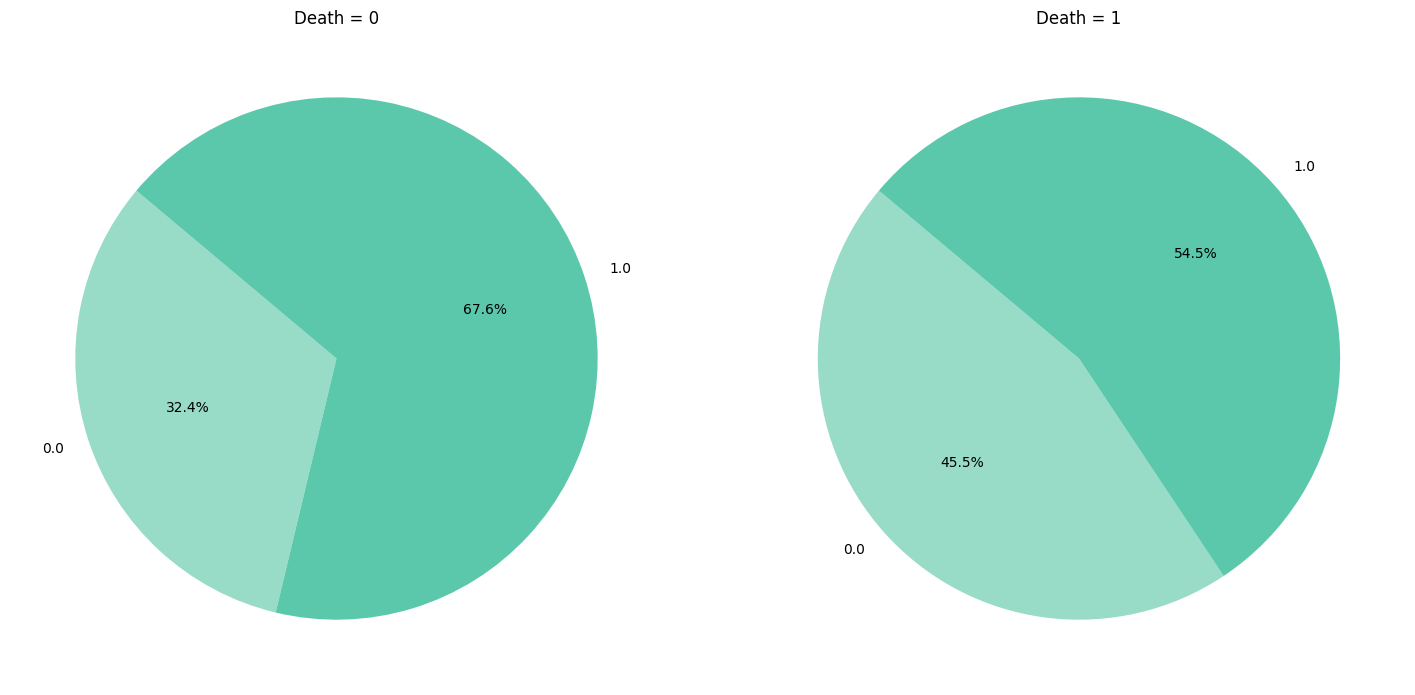

In [ ]:
# two pie charts comparing the proportions of some binary variable within two groups: Death = 0 and Death = 1.

# Calculating the counts for PR within the Alive (Death = 0) and Death (Death = 1) groups
pr_proportions = data.groupby(['Death', 'PR']).size().unstack(fill_value=0)
pr_proportions = pr_proportions.div(pr_proportions.sum(axis=1), axis=0)
# Now let's create the pie charts with these proportions
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# Pie chart for Alive
axes[0].pie(pr_proportions.loc[0], labels=pr_proportions.columns, autopct='%1.1f%%', startangle=140, colors=['#98DBC6', '#5BC8AC'])
axes[0].set_title('Death = 0')
# Pie chart for Death
axes[1].pie(pr_proportions.loc[1], labels=pr_proportions.columns, autopct='%1.1f%%', startangle=140, colors=['#98DBC6', '#5BC8AC'])
axes[1].set_title('Death = 1')
# Display the pie charts
plt.tight_layout()
plt.show()

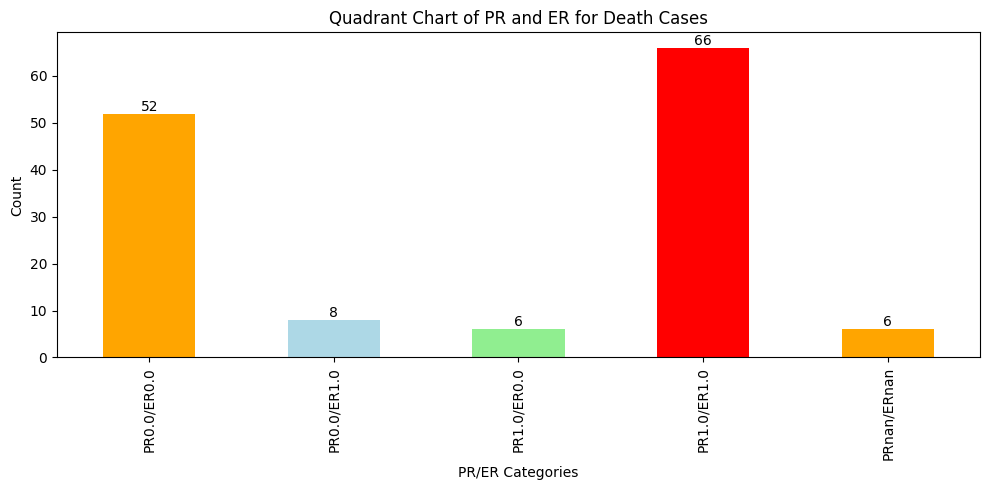

In [ ]:
# a bar chart for counts of different combinations of PR and ER for Death cases.
# We will recreate this by first calculating the counts for each combination of PR and ER where Death = 1.
# Create a new column that combines the PR and ER status
data['PR_ER'] = 'PR' + data['PR'].astype(str) + '/ER' + data['ER'].astype(str)
# Filter the data for death cases
death_cases = data[data['Death'] == 1]
# Calculate the counts for each PR/ER category
pr_er_counts = death_cases['PR_ER'].value_counts().sort_index()
# Define colors for the bars
colors = ['orange', 'lightblue', 'lightgreen', 'red']
# Plotting the bar chart
plt.figure(figsize=(10, 5))
pr_er_counts.plot(kind='bar', color=colors)
# Adding title and labels
plt.title('Quadrant Chart of PR and ER for Death Cases')
plt.xlabel('PR/ER Categories')
plt.ylabel('Count')
# Annotate counts above the bars
for index, value in enumerate(pr_er_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
# Show the plot
plt.tight_layout()
plt.show()

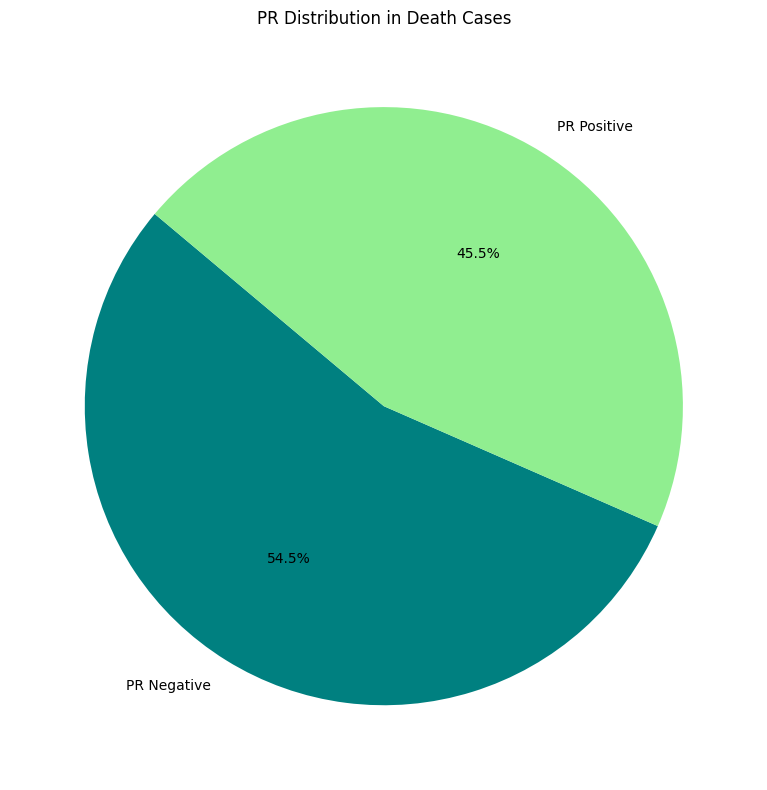

In [ ]:
# a pie chart for PR distribution in death cases with two categories: PR Positive and PR Negative.

# Filter the data for death cases
death_cases_pr = data[data['Death'] == 1]['PR']
# Calculate the counts for PR status in death cases
pr_distribution = death_cases_pr.value_counts(normalize=True)
# Define colors for the pie chart
pie_colors = ['teal', 'lightgreen']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pr_distribution, labels=['PR Negative', 'PR Positive'], autopct='%1.1f%%', startangle=140, colors=pie_colors)
# Adding title
plt.title('PR Distribution in Death Cases')
# Display the pie chart
plt.tight_layout()
plt.show()

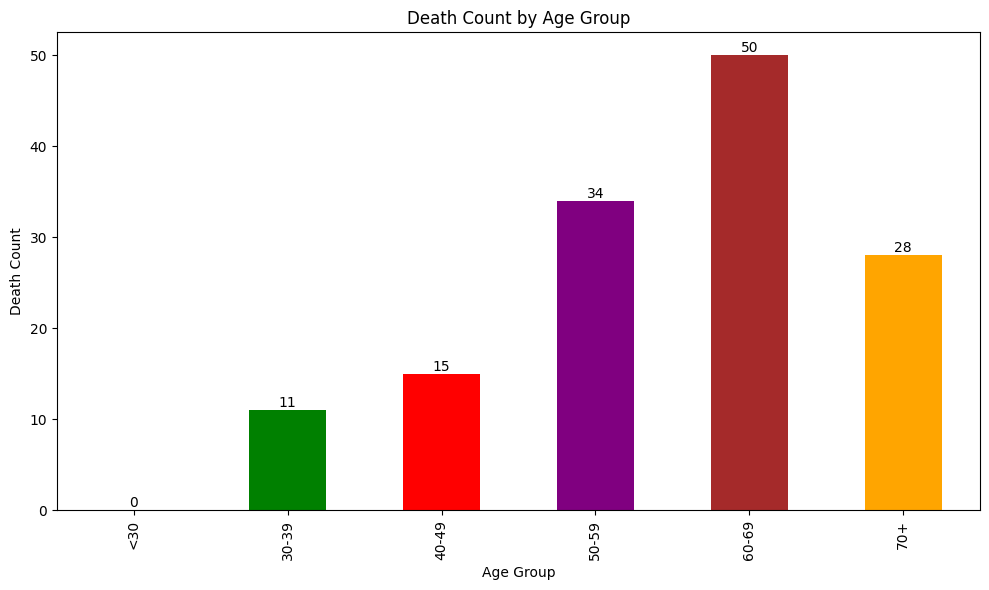

In [ ]:
# a bar chart for death counts by age group with different colors for each bar.
# We'll recreate this by first creating the appropriate age groups and then counting the deaths within each group.
# Define age groups
bins = [0, 30, 40, 50, 60, 70, data['age'].max()]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
# Filter the data for death cases
death_data_by_age = data[data['Death'] == 1]
# Calculate the counts for each age group
death_counts_by_age_group = death_data_by_age['age_group'].value_counts().reindex(labels)
# Define colors for the bars
bar_colors = ['orange', 'green', 'red', 'purple', 'brown']
# Plotting the bar chart
plt.figure(figsize=(10, 6))
death_counts_by_age_group.plot(kind='bar', color=bar_colors)
# Adding title and labels
plt.title('Death Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Count')
# Annotate counts above the bars
for index, value in enumerate(death_counts_by_age_group):
    plt.text(index, value, str(value), ha='center', va='bottom')
# Show the plot
plt.tight_layout()
plt.show()

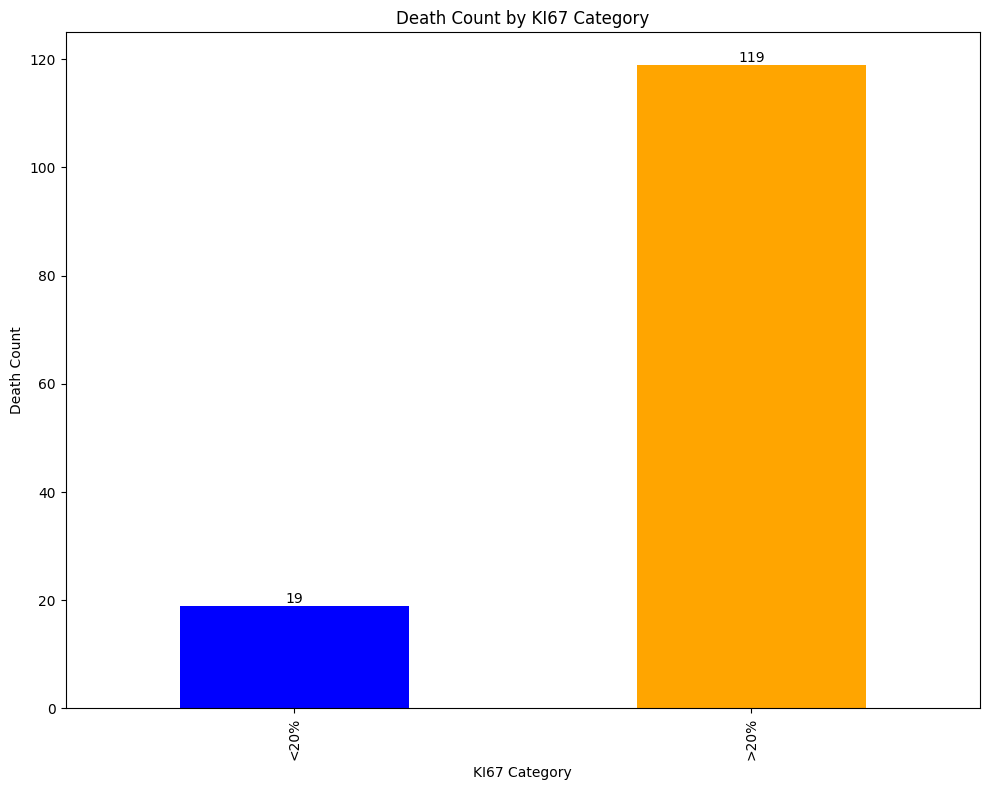

In [ ]:
# a bar chart for death counts by KI67 categories: '<20%' and '>20%'.
# We'll recreate this by first categorizing the KI67 data and then counting the deaths for each category.
# Categorize the KI67 data
data['KI67_category'] = data['KI67'].apply(lambda x: '<20%' if x < 20 else '>20%')
# Filter the data for death cases
death_data_ki67 = data[data['Death'] == 1]
# Calculate the counts for each KI67 category
ki67_death_counts = death_data_ki67['KI67_category'].value_counts().reindex(['<20%', '>20%'])
# Define colors for the bars
ki67_colors = ['blue', 'orange']
# Plotting the bar chart
plt.figure(figsize=(10, 8))
ki67_death_counts.plot(kind='bar', color=ki67_colors)
# Adding title and labels
plt.title('Death Count by KI67 Category')
plt.xlabel('KI67 Category')
plt.ylabel('Death Count')
# Annotate counts above the bars
for index, value in enumerate(ki67_death_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
# Show the plot
plt.tight_layout()
plt.show()

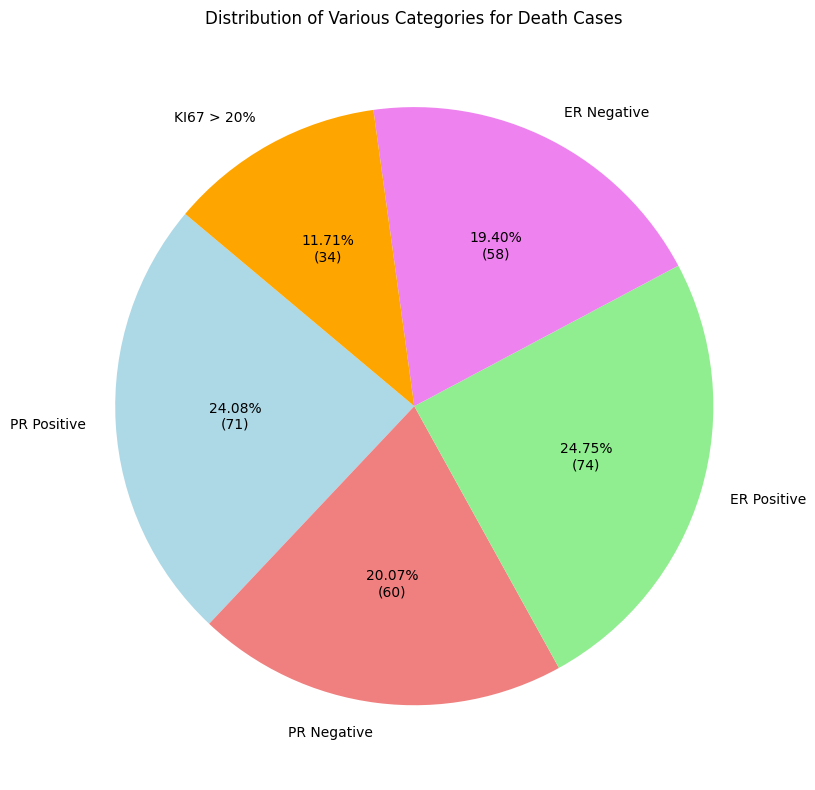

In [ ]:
# The image shows a pie chart for the distribution of various categories for death cases, including PR and ER statuses and KI67 expression.
# We will recreate this pie chart by calculating the counts of each category among death cases.

# Filter the data for death cases
death_cases = data[data['Death'] == 1]

# Calculate the counts for PR and ER status, and KI67 expression
categories_counts = {
    'PR Positive': (death_cases['PR'] == 1).sum(),
    'PR Negative': (death_cases['PR'] == 0).sum(),
    'ER Positive': (death_cases['ER'] == 1).sum(),
    'ER Negative': (death_cases['ER'] == 0).sum(),
    'KI67 > 20%': (death_cases['KI67'] > 20).sum()
}

# Define the order and colors for the pie chart
category_order = ['PR Positive', 'PR Negative', 'ER Positive', 'ER Negative', 'KI67 > 20%']
colors = ['lightblue', 'lightcoral', 'lightgreen', 'violet', 'orange']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    [categories_counts[key] for key in category_order],
    labels=category_order,
    autopct=lambda pct: f"{pct:.2f}%\n({int(pct/100.*sum(categories_counts.values()))})",
    colors=colors,
    startangle=140
)

# Increase the size of the autopct to make it more readable
for autotext in autotexts:
    autotext.set_size(10)

# Adding title
plt.title('Distribution of Various Categories for Death Cases')

# Display the pie chart
plt.tight_layout()
plt.show()